<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/quantum-protocols-algos/qpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q qiskit

In [5]:
!pip install -q pylatexenc

In [6]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-u8g_t6z8
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-u8g_t6z8
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

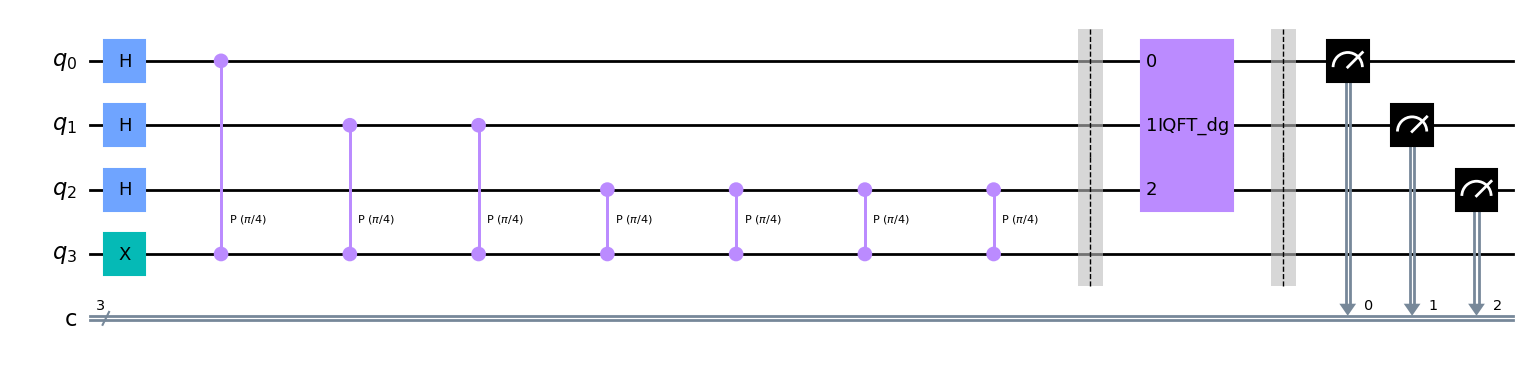

In [9]:
qpe = QuantumCircuit(4,3)
qpe.x(3)

for qubit in range(3):
  qpe.h(qubit)

repetitions = 1
for counting_qubit in range(3):
  for i in range(repetitions):
    qpe.cp(math.pi/4, counting_qubit, 3)
  repetitions *= 2

qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw("mpl")

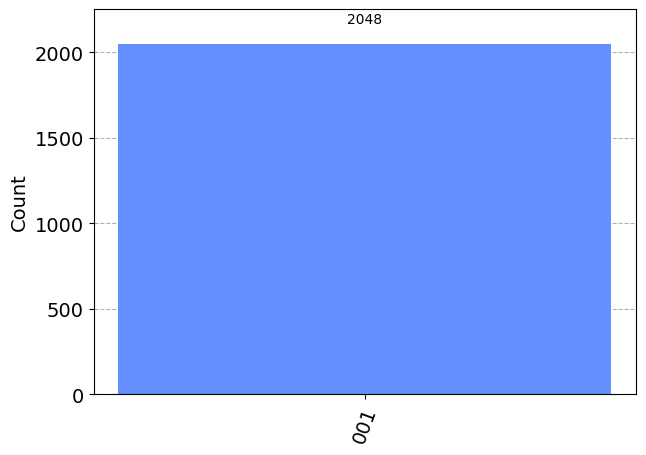

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

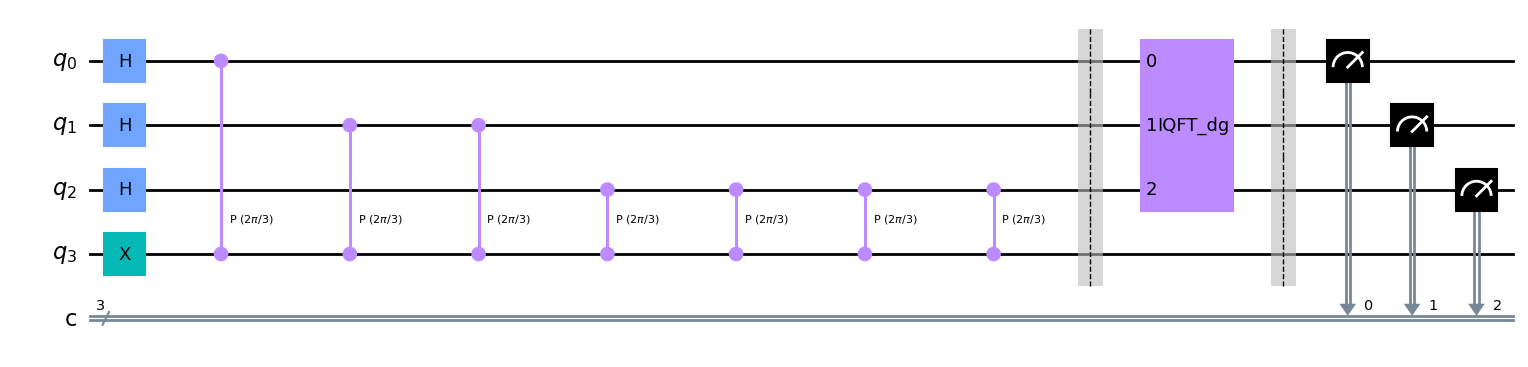

In [11]:
qpe = QuantumCircuit(4,3)
qpe.x(3)

for qubit in range(3):
  qpe.h(qubit)

repetitions = 1
for counting_qubit in range(3):
  for i in range(repetitions):
    qpe.cp(2*math.pi/3, counting_qubit, 3)
  repetitions *= 2

qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw("mpl")

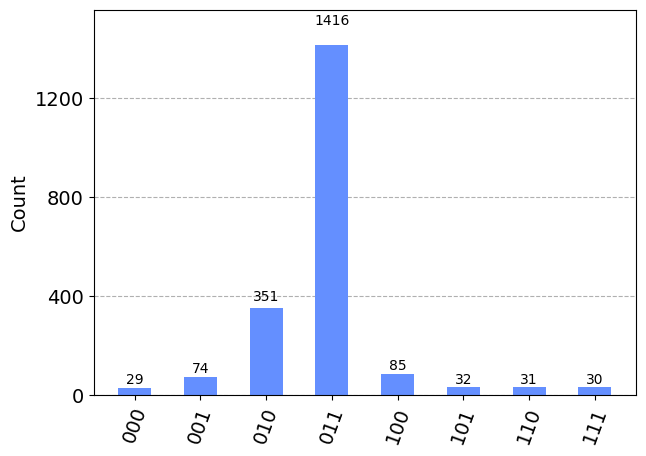

In [12]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

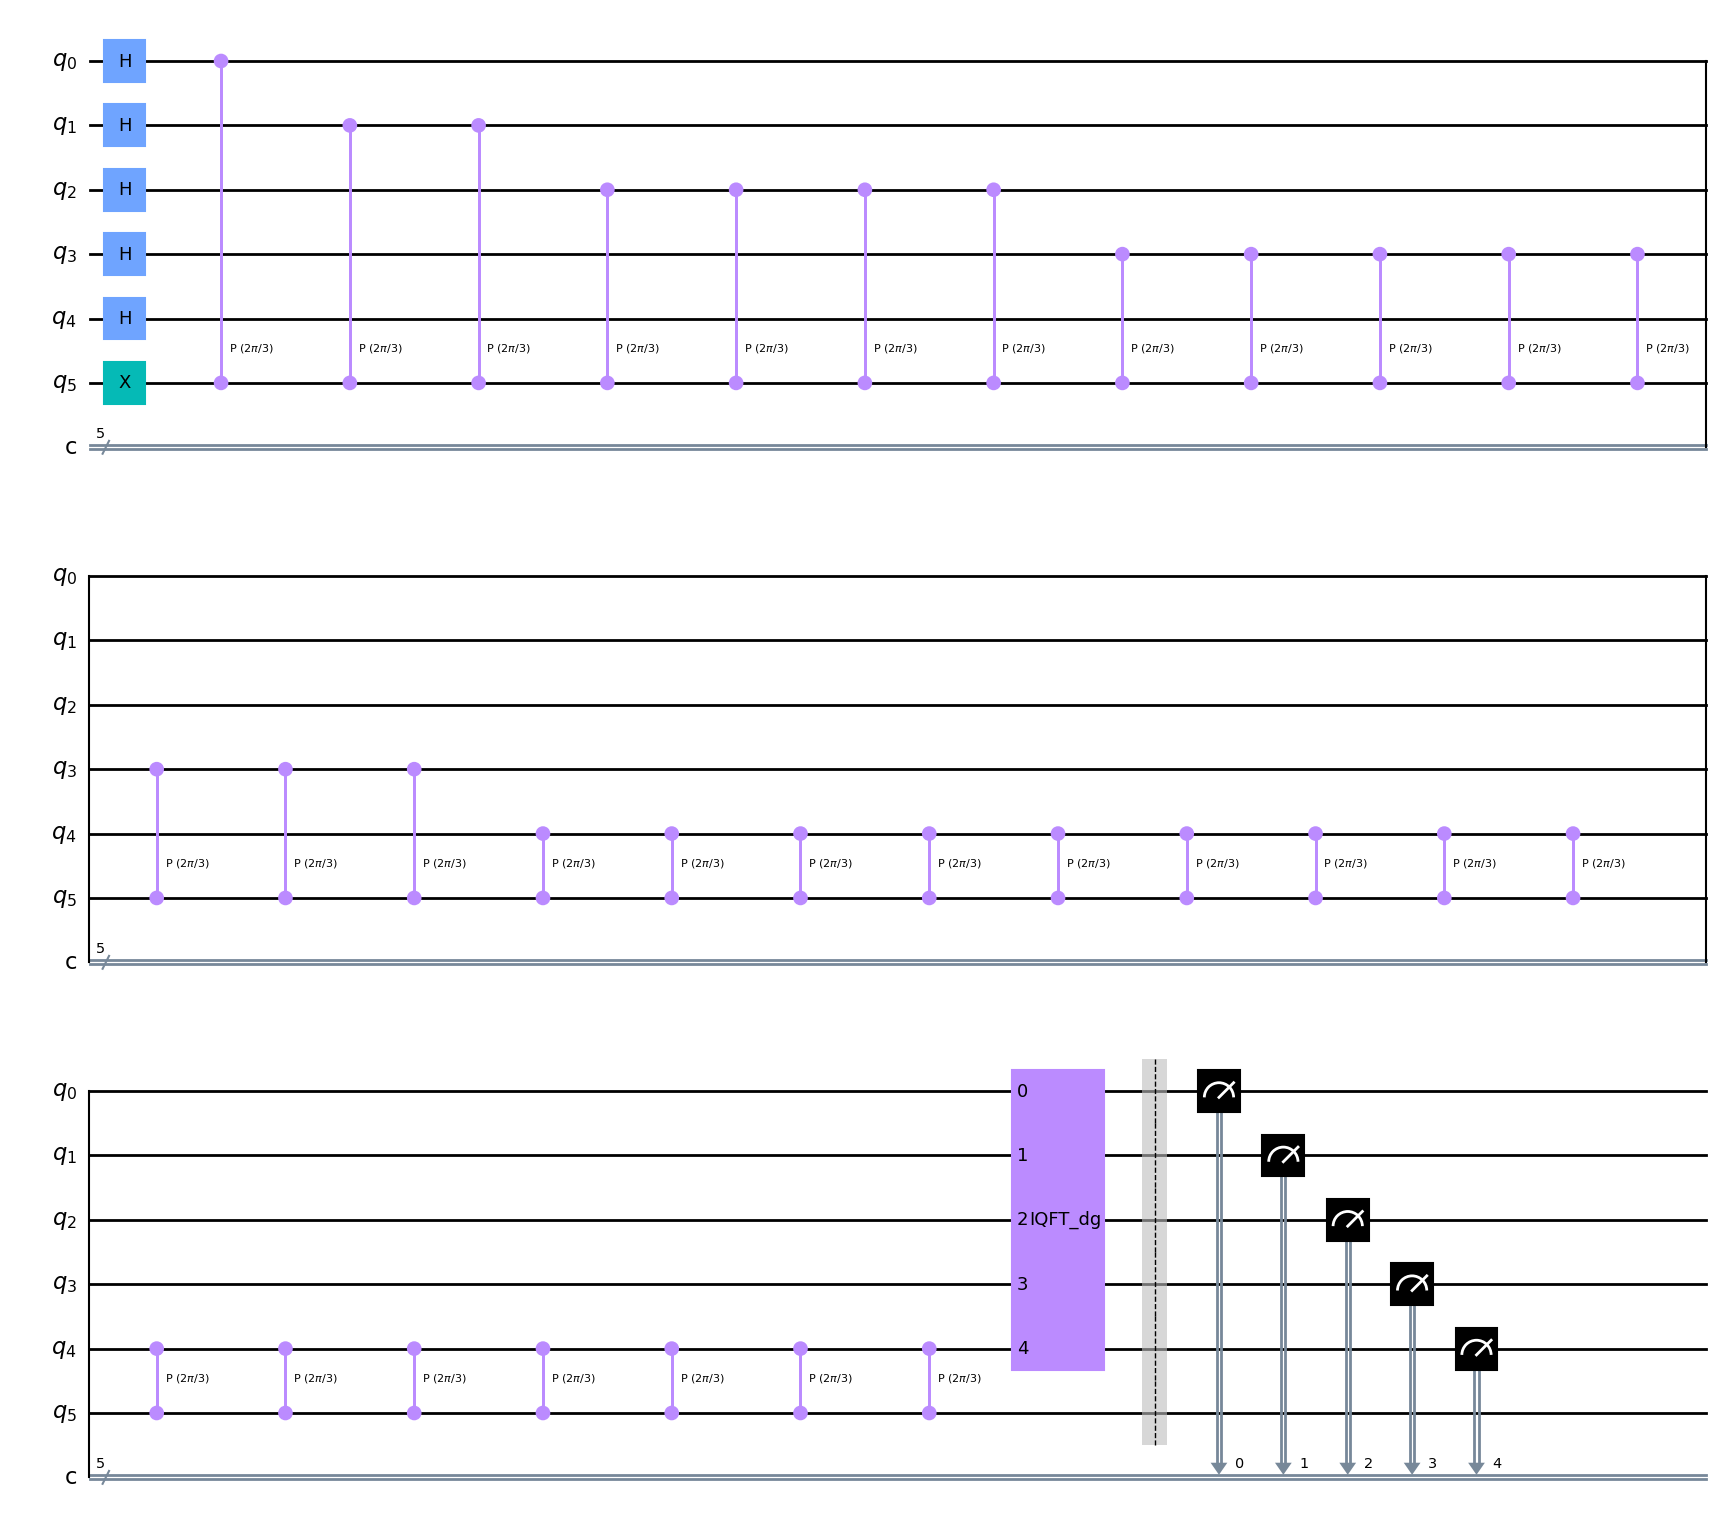

In [14]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw("mpl")

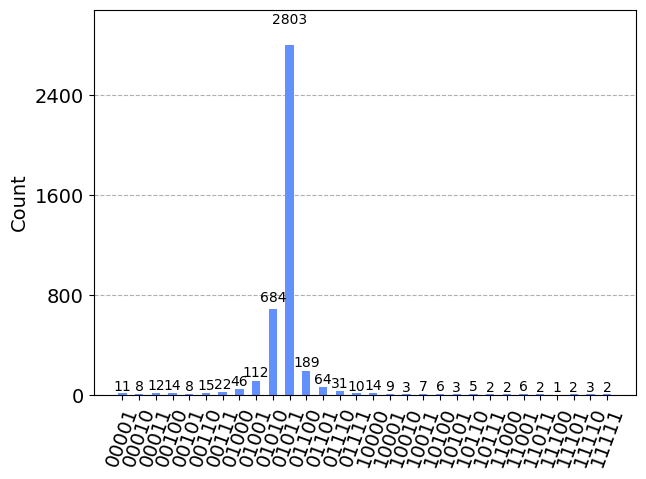

In [15]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [23]:
def qpe_function(n, theta):
  qpe = QuantumCircuit(n + 1, n)

  qpe.x(n)
  for i in range(n):
    qpe.h(i)

  repetitions = 1
  for r in range(n):
    for i in range(repetitions):
      qpe.cp(2*np.pi*theta, r, n)
    repetitions *= 2

  qpe.barrier()

  qpe = qpe.compose(QFT(n, inverse=True), range(n))

  qpe.barrier()

  qpe.measure(range(n), range(n))

  return qpe


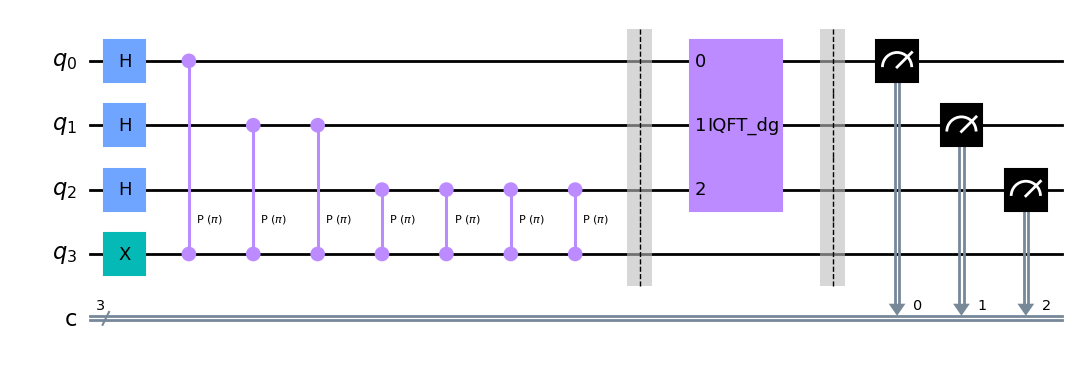

In [24]:
qc = qpe_function(3, 0.5)
qc.draw("mpl")

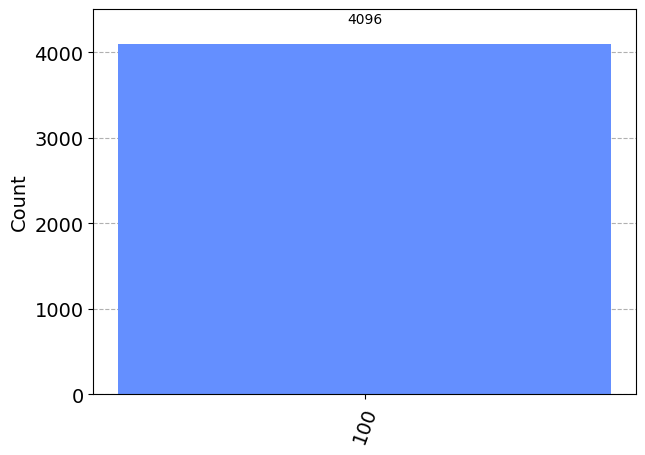

In [25]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

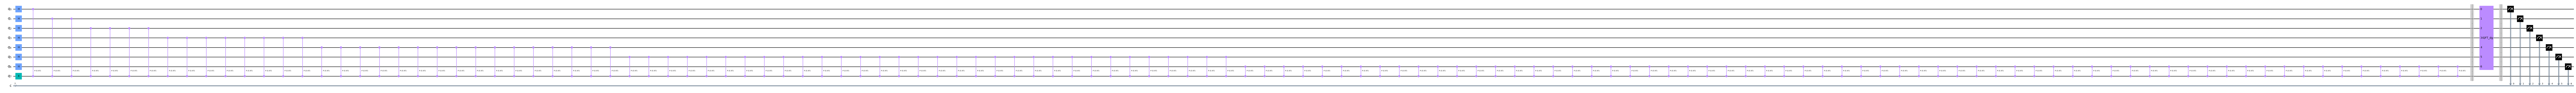

In [29]:
qc = qpe_function(7, 0.95)
qc.draw("mpl", fold = -1)

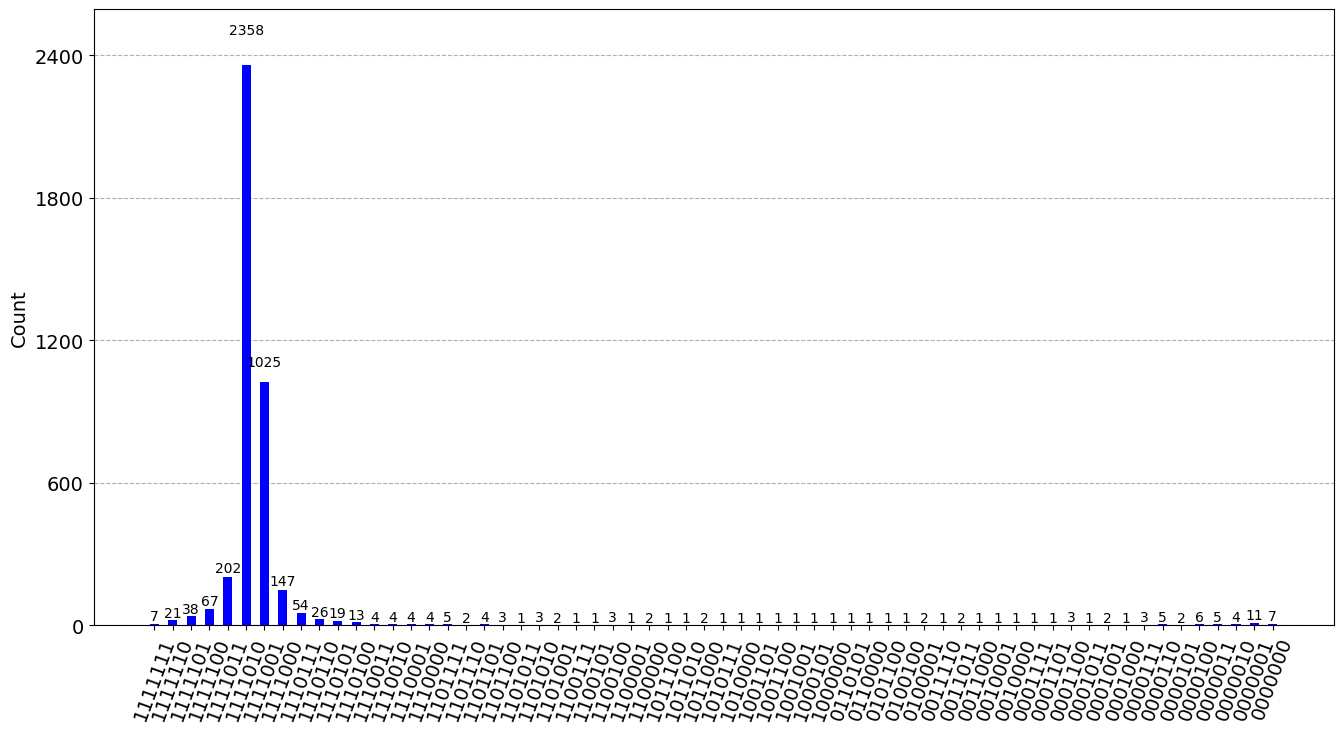

In [36]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize = (16, 8), sort = "desc", color = "blue")